In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [85]:
test =  pd.read_csv('test.csv')

In [4]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
train.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
train.shape

(140700, 20)

In [7]:
train.duplicated().sum()

0

In [8]:
train.drop(columns=['Academic Pressure', 'CGPA' , 'Study Satisfaction', 'id'], inplace=True)

In [9]:
train.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [10]:
train.dtypes

Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [11]:
train.isna().sum()

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
X = [col for col in train.columns if col not in ['Depression']]
Y = ['Depression']

In [14]:
X

['Name',
 'Gender',
 'Age',
 'City',
 'Working Professional or Student',
 'Profession',
 'Work Pressure',
 'Job Satisfaction',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness']

In [15]:
Y

['Depression']

In [16]:
categorial = [col for col in X if train[col].dtype == 'O']
numerical = [col for col in X if col not in categorial]

In [17]:
categorial

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [18]:
numerical

['Age',
 'Work Pressure',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

# for numerical column

In [19]:
imputer = SimpleImputer(strategy='mean')

In [20]:
train[numerical] = imputer.fit_transform(train[numerical])

# for categorial column

In [21]:
imputer = SimpleImputer(strategy='most_frequent')
train[categorial] = imputer.fit_transform(train[categorial])

In [22]:
train.isna().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorial:
    train[column] = encoder.fit_transform(train[column])

In [24]:
train.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,11,0,49.0,50,1,10,5.000000,2.000000,29,7,33,0,1.0,2.0,0,0
1,407,1,26.0,93,1,55,4.000000,3.000000,27,20,63,1,7.0,3.0,0,1
2,417,1,33.0,97,0,55,2.998998,2.974404,15,7,21,1,3.0,1.0,0,1
3,417,1,22.0,64,1,55,5.000000,1.000000,27,15,28,1,10.0,1.0,1,1
4,286,0,30.0,37,1,9,1.000000,1.000000,15,20,28,1,9.0,4.0,1,0


In [25]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [26]:
x.shape

(140700, 15)

In [27]:
y.shape

(140700,)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(112560, 15)

In [31]:
y_train.shape

(112560,)

In [32]:
X_test.shape

(28140, 15)

In [33]:
y_test.shape

(28140,)

In [34]:
#model building
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [36]:
# Determine number of Depressed cases in dataset
depressed = train[train['Depression'] == 1]
not_depressed = train[train['Depression'] == 0]

In [37]:
outlierFraction = len(depressed)/(len(not_depressed))
print(outlierFraction)

print('depressed: {}'.format(len(depressed)))
print('not_depressed: {}'.format(len(not_depressed)))

0.22206491622731972
depressed: 25567
not_depressed: 115133


In [39]:
# Building the Random Forest Classifier (RANDOM FOREST)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predictions
yPred = rfc.predict(X_test)

In [40]:
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9284648187633262
The precision is 0.820706555033694
The recall is 0.7797826930539387
The F1-Score is 0.7997214207541539
The Matthews correlation coefficient is0.7565785286920897


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

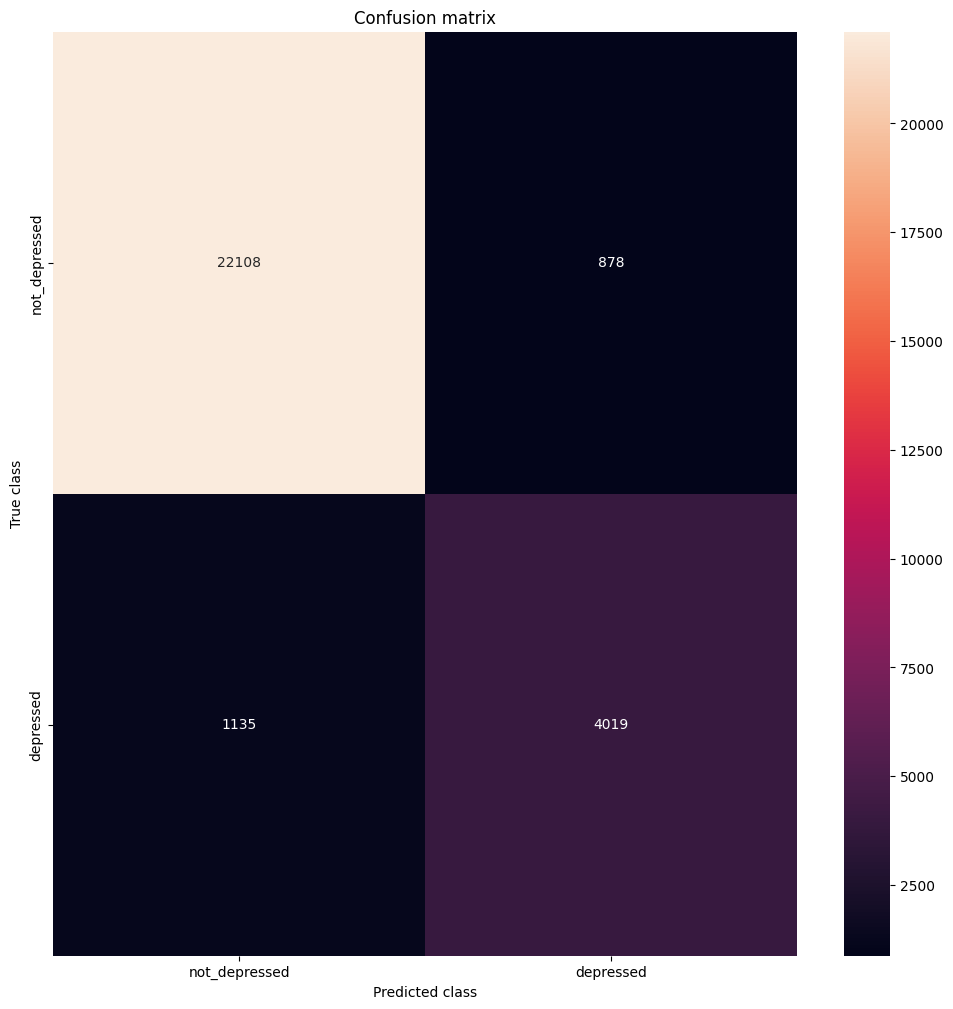

In [43]:
# printing the confusion matrix
LABELS = ['not_depressed', 'depressed']

conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)
yPred = model.predict(X_test)

C:\Users\cchin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print("The model used is Logestic Regression")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logestic Regression
The accuracy is 0.9271144278606965
The precision is 0.814387031408308
The recall is 0.7797826930539387
The F1-Score is 0.7967092873426505
The Matthews correlation coefficient is0.7525953977776819


In [47]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 409.6 kB/s eta 0:05:05
   ---------------------------------------- 0.1/124.9 MB 416.7 kB/s eta 0:05:00
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.2/124.9 MB 615.9 kB/s eta 0:03:23
   ---------------------------------------- 0.2/124.9 MB 687.0 kB/s eta 0:03:02
   ---------------------------------------- 0.3/124.9 MB 739.6 kB/s eta 0:02:49
   ---------------------------------------- 0.3/124.9 MB 805.1 kB/s eta 0:02:35
   ---------------------------------------- 0.4/124.9 MB 879.6 kB/s eta 0:02:22
   ---------------------------------------- 0.5/124.9 MB 938.8 kB/s eta 0:02:13
   ---------------------------------------- 0.5/124.9 MB 8

In [48]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum tree depth
    subsample=0.8,           # Fraction of samples used for fitting individual trees
    colsample_bytree=0.8,    # Fraction of features used per tree
    random_state=42,         # For reproducibility
    use_label_encoder=False  # Avoids a warning for newer versions of XGBoost
)
model.fit(X_train, y_train)
yPred = model.predict(X_test)

C:\Users\cchin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [49]:
print("The model used is XGBoost")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is XGBoost
The accuracy is 0.9310234541577825
The precision is 0.8160535117056856
The recall is 0.8048117966627862
The F1-Score is 0.8103936700205138
The Matthews correlation coefficient is0.7682675113342211


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

C:\Users\cchin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [51]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)
yPred = model.predict(X_test)

In [54]:
print("The model used is SVM")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is SVM
The accuracy is 0.8973702914001421
The precision is 0.740552016985138
The recall is 0.676755917733799
The F1-Score is 0.7072181670721817
The Matthews correlation coefficient is0.6461132206032107


# test data 

In [86]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [55]:
test.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [56]:
test.duplicated().sum()

0

In [57]:
test.shape

(93800, 19)

In [58]:
test.drop(columns=['Academic Pressure', 'CGPA' , 'Study Satisfaction', 'id'], inplace=True)

In [59]:
test.dtypes

Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Work Pressure                            float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
dtype: object

In [60]:
X_test = [col for col in train.columns if col not in ['Depression']]
Y_test = ['Depression']

In [61]:
categorial_test = [col for col in X if train[col].dtype == 'O']
numerical_test = [col for col in X if col not in categorial]

In [65]:
imputer = SimpleImputer(strategy='mean')
test[numerical] = imputer.fit_transform(test[numerical])

In [66]:
imputer = SimpleImputer(strategy='most_frequent')
test[categorial] = imputer.fit_transform(test[categorial])

In [67]:
test.isna().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [80]:
train.shape
test.shape

(93800, 15)

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorial:
    test[column] = encoder.fit_transform(test[column])

In [71]:
test.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,288,1,53.0,67,1,27,2.000000,5.00000,25,12,53,0,9.0,3.0,1
1,279,0,58.0,25,1,19,2.000000,4.00000,25,12,16,0,6.0,4.0,0
2,365,1,53.0,21,1,56,4.000000,1.00000,16,12,12,1,12.0,4.0,0
3,191,0,23.0,47,0,56,3.011797,2.96092,27,12,35,1,10.0,4.0,0
4,285,1,47.0,22,1,56,5.000000,5.00000,16,12,28,1,3.0,4.0,0


In [82]:
test_x= test.iloc[:,:]


# Fitting the model on whole data and validating on the Test dataset:

In [76]:
final_xgboost_model =  XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum tree depth
    subsample=0.8,           # Fraction of samples used for fitting individual trees
    colsample_bytree=0.8,    # Fraction of features used per tree
    random_state=42,         # For reproducibility
    use_label_encoder=False  # Avoids a warning for newer versions of XGBoost
)

In [83]:
final_xgboost_model.fit(x, y)
y_pred = final_xgboost_model.predict(test_x)

C:\Users\cchin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Submission

In [87]:
submission = pd.DataFrame({
    'id': test['id'],  
    'Depression': y_pred  
})
submission.to_csv('submission5.csv', index=False)

In [88]:
submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [89]:
submission.isna().sum()

id            0
Depression    0
dtype: int64